<a href="https://colab.research.google.com/github/zhensongren/learn-ml/blob/master/python_distribution_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Get peak location
2. FWHM
3. Integration
4. AsF

In [418]:
import numpy as np
import pandas as pd
# !pip install fitter
from scipy import signal
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Get peak data

In [419]:
# noise
mu, sigma = 0, 0.025 # mean and standard deviation
N = 151
s = np.random.normal(mu, sigma, N) 

# Peaks and surrounding background
peak = signal.gaussian(N, std=7, sym=False) + s
peak2 = 5*signal.gaussian(N, std=3, sym=False) + s
bg = np.random.normal(mu, sigma, N)

# simulate peaks
ems = np.append(peak2, [bg, peak])
ext = np.append(peak2*3, [bg, bg])
x = np.arange(0, len(ems)) + 400

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=ext,
    mode='markers',
    marker={'size':5}
))

fig.add_trace(go.Scatter(
    x=x,
    y=ems,
    mode='markers',
    marker={'size':5}
))

fig.show()

# test fitter for finding distibution type

,sumsquare_error,aic,bic,kl_div
gamma,74.185186,691.071091,-801.277746,inf
norm,120.298355,2528.801512,-588.408698,inf


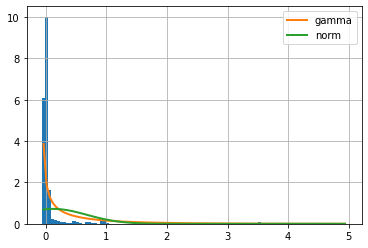

In [420]:
from scipy import stats
from fitter import Fitter
from fitter import get_common_distributions
get_common_distributions()
f = Fitter(ems, distributions=["gamma", "norm"])
f.fit()

f.summary()



# interp1d examplem


In [421]:
from scipy.interpolate import interp1d
x = x
y = ems
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(x.min(), x.max(), num=len(x)*5, endpoint=True)

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(name="cubic", x=xnew, y=f(xnew), legendrank=4))
fig.add_trace(go.Scatter(name="linear", x=xnew, y=f2(xnew), legendrank=2))
fig.add_trace(go.Scatter(name="original", x=x, y=y, legendrank=1, mode='markers'))
fig.show()

In [422]:
f(xnew).max(), f2(xnew).max()

(4.952447304126397, 5.0039843452334845)

In [423]:
# %matplotlib inline

# import warnings
# import numpy as np
# import pandas as pd
# import scipy.stats as st
# import statsmodels.api as sm
# from scipy.stats._continuous_distns import _distn_names
# import matplotlib
# import matplotlib.pyplot as plt

# matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
# matplotlib.style.use('ggplot')

# # Create models from data
# def best_fit_distribution(data, bins=200, ax=None):
#     """Model data by finding best fit distribution to data"""
#     # Get histogram of original data
#     y, x = np.histogram(data, bins=bins, density=True)
#     x = (x + np.roll(x, -1))[:-1] / 2.0

#     # Best holders
#     best_distributions = []

#     # Estimate distribution parameters from data
#     for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

#         print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

#         distribution = getattr(st, distribution)

#         # Try to fit the distribution
#         try:
#             # Ignore warnings from data that can't be fit
#             with warnings.catch_warnings():
#                 warnings.filterwarnings('ignore')
                
#                 # fit dist to data
#                 params = distribution.fit(data)

#                 # Separate parts of parameters
#                 arg = params[:-2]
#                 loc = params[-2]
#                 scale = params[-1]
                
#                 # Calculate fitted PDF and error with fit in distribution
#                 pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
#                 sse = np.sum(np.power(y - pdf, 2.0))
                
#                 # if axis pass in add to plot
#                 try:
#                     if ax:
#                         pd.Series(pdf, x).plot(ax=ax)
#                     end
#                 except Exception:
#                     pass

#                 # identify if this distribution is better
#                 best_distributions.append((distribution, params, sse))
        
#         except Exception:
#             pass

    
#     return sorted(best_distributions, key=lambda x:x[2])

# def make_pdf(dist, params, size=10000):
#     """Generate distributions's Probability Distribution Function """

#     # Separate parts of parameters
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]

#     # Get sane start and end points of distribution
#     start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
#     end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

#     # Build PDF and turn into pandas Series
#     x = np.linspace(start, end, size)
#     y = dist.pdf(x, loc=loc, scale=scale, *arg)
#     pdf = pd.Series(y, x)

#     return pdf

# # Load data from statsmodels datasets
# data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# # Plot for comparison
# plt.figure(figsize=(12,8))
# ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# # Save plot limits
# dataYLim = ax.get_ylim()

# # Find best fit distribution
# best_distibutions = best_fit_distribution(data, 200, ax)
# best_dist = best_distibutions[0]

# # Update plots
# ax.set_ylim(dataYLim)
# ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
# ax.set_xlabel(u'Temp (°C)')
# ax.set_ylabel('Frequency')

# # Make PDF with best params 
# pdf = make_pdf(best_dist[0], best_dist[1])

# # Display
# plt.figure(figsize=(12,8))
# ax = pdf.plot(lw=2, label='PDF', legend=True)
# data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

# param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
# param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
# dist_str = '{}({})'.format(best_dist[0].name, param_str)

# ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
# ax.set_xlabel(u'Temp. (°C)')
# ax.set_ylabel('Frequency')


# curve fit

## find peak location by searching max of intensity

In [424]:
def get_peak_loc(x, y):
 
  """
  find the peak location for the spectrum
  """
  y = y/y.max()
  # convert the index of y, to x values
  peak_x = []
  peaks, properties = find_peaks(y, prominence=0.1)
  for i, xi in enumerate(x):
    if i in peaks:
      peak_x.append(xi)
  return peak_x

## find peak location by fitting

In [425]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit

# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

def get_peak_height(x, y):
  fig = go.Figure()
  fig.add_trace(go.Scatter(name="raw data", x=x, y=y, mode='markers'))
  # fig.add_trace(go.Scatter(name="raw", x=x[indices], y=ext[indices], mode='markers'))
  for peak_loc in get_peak_loc(x, y):
    fit_range = 4
    indices = np.where((x > peak_loc-fit_range) & (x <= peak_loc+fit_range))[0]

    # curve fit
    popt, _ = curve_fit(objective, x[indices], y[indices])
    # summarize the parameter values
    a, b, c = popt
    # print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

    # define a sequence of inputs between the smallest and largest known inputs
    x_line = arange(min(x[indices]), max(x[indices]), 0.1)
    # x_line = arange(x[properties['left_bases']], x[properties['right_bases']], 0.1)
    # calculate the output for the range
    y_line = objective(x_line, a, b, c)

    fig.add_trace(go.Scatter(name="fit", x=x_line, y=y_line,  
                             mode="lines", 
                             line=dict(color="Crimson")))
    fig.add_annotation(x=peak_loc, y=y[indices].max(),
                text=f"observed peak max:\n {peak_loc}    \n fitted peak max:\n {x_line[np.where((y_line == y_line.max()))][0]}",
                showarrow=True,
                arrowhead=4)  
  fig.update_layout(title="Peak fitting with 2nd order polyminal")
  fig.show()


In [426]:
get_peak_height(x, ems)

## find peak FWHM

In [427]:
def get_fwhm(peak_idx, x, y):
  indices = []
  for i in range(len(y)):
    if (y[i] >= y.max()/2.0) and (np.abs(i-peak_idx)<15):
      indices.append(i)
  # indices = [i for i in range(len(x)) if (y[i] >= y.max()/2.0) & (np.abs(i-peak_idx)<5)]
  x_range = x[indices]
  print(x_range)
  if x_range.size > 0:
    print(max(x_range) - min(x_range))
get_fwhm(8, x, ext)

[]


In [428]:
def get_gaussian(x, a, x0, sigma):
	return a*np.exp(-(x-x0)**2/(2*sigma**2))

def fit_peak(peak_loc, x, y):
  fit_range = 20
  indices = np.where((x > peak_loc-fit_range) & (x <= peak_loc+fit_range))[0]
  popt, pcov = curve_fit(get_gaussian, x, y)
  x, y = x[indices], y[indices]
  x_line = np.arange(min(x), max(x), 0.1)
  y_line = get_gaussian(x_line, popt[0], popt[1], popt[2])
  fig = go.Figure()
  fig.add_trace(go.Scatter(name="raw data", x=x, y=y, mode='markers'))
  fig.add_trace(go.Scatter(name="fit", x=x_line, y=y_line,  
                            mode="lines", 
                            line=dict(color="Crimson")))
  fig.add_annotation(x=peak_loc, y=y.max(),
              text=f"observed peak max:\n {peak_loc}    \n fitted peak max:\n {x_line[np.where((y_line == y_line.max()))][0]}",
              showarrow=True,
              arrowhead=4) 
  fig.show()

In [429]:
for peak_loc in get_peak_loc(x, ext):
  fit_peak(peak_loc, x, ext)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

